In [108]:
%pylab
%matplotlib inline
import pandas as pd

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [132]:
def min_max_scale(x):
    min_ = x.min()
    max_ = x.max()
    return (x-min_) / (max_-min_)

In [57]:
cos_score = pd.read_csv("../sv_system/embeddings/voxc12_fbank64_embeds/scores/cosine_scores", delimiter=' ', names=['enroll_id', 'test_id', 'score']) 
lda_score = pd.read_csv("../sv_system/embeddings/voxc12_fbank64_embeds/scores/lda_scores", delimiter=' ', names=['enroll_id', 'test_id', 'score']) 
plda_score = pd.read_csv("../sv_system/embeddings/voxc12_fbank64_embeds/scores/plda_scores", delimiter=' ', names=['enroll_id', 'test_id', 'score']) 

In [103]:
trial = pd.read_csv("/dataset/SV_sets/voxceleb1/dataframes/voxc1_sv_trial.csv")
spks = trial.enroll_spk.unique().tolist()

In [346]:
import numpy as np
score = plda_score
score['enroll_spk'] = trial.enroll_spk
score['enroll_fr'] = trial.enroll_fr
score['test_spk'] = trial.test_spk
score['test_fr'] = trial.test_fr
score['conf'] = score.score
score.loc[1::2, 'conf'] = -score.loc[1::2].conf
score['conf'] = min_max_scale(score.conf)

### 화자 단위의 Conf 변화 

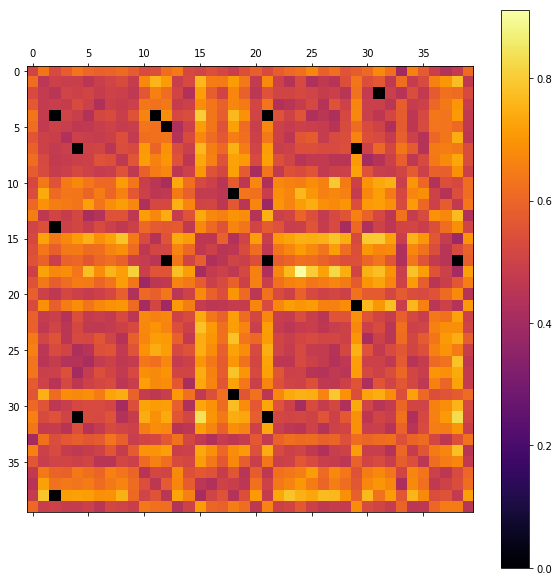

In [347]:
conf_pairs = score.groupby(['enroll_spk', 'test_spk']).conf.mean()
conf_mat = np.zeros((40,40))

for i, row in conf_pairs.iteritems():
    i_r, i_c = spks.index(i[0]), spks.index(i[1])
    conf_mat[i_r][i_c] = row

plt.figure(figsize=(10,10)) 
plt.matshow(conf_mat, cmap=plt.cm.inferno, fignum=1)
plt.colorbar()
plt.show()

### 각 화자에서 utterance 단위의 conf 변화

In [348]:
enroll_spk = spks[0]
print(enroll_spk)

id10270


In [349]:
spk_score = score[score.enroll_spk == enroll_spk]

같은 speaker안의 enroll utterance 차이보다 test utterance로 인한 confidence 차이가 크다.

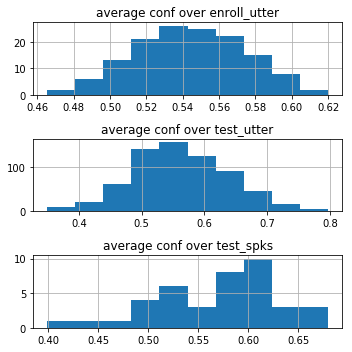

In [350]:
plt.figure(figsize=(5, 5))
plt.subplot(311)
plt.title("average conf over enroll_utter")
spk_score.groupby('enroll_id').conf.mean().hist()
plt.subplot(312)
plt.title("average conf over test_utter")
spk_score.groupby('test_id').conf.mean().hist()
plt.subplot(313)
plt.title("average conf over test_spks")
spk_score.groupby('test_spk').conf.mean().hist()
plt.tight_layout()

### Utterance 길이에 따른 Conf 변화

pearson은 값 자체의 상관도를 그리고 speakerman은 rank의 상관도를 측정한다.

enroll, test, 그리고 enrll+test frame에 대한 confidence의 상관도는 약 0.15 ~ 0.22정도로 나온다. 

양의 상관관계가 있다고 할 수 있다.  

그러나 spearman의 결과에서 봤듯이 frame이 길다고 해서 무조건 confidence가 높은 것이 아니다.

그리고 길이에 대하여 score의 분포를 봤는데 길이가 길다고 해서 무조건 pos score가 큰 것도 아니고 neg score가 작은 것도 아니다.

In [230]:
# sv_df = pd.read_csv("/dataset/SV_sets/voxceleb1/dataframes/voxc1_sv.csv")

# n_frames = {}
# for idx, row in sv_df.iterrows():
#     file_path = "/dataset/SV_sets/voxceleb12/feats/fbank64_vad/"+row.file+".npy"
#     in_file = np.load(file_path)
#     n_frames[row.id] = in_file.shape[0]

In [231]:
score['total_fr'] = score.enroll_fr + score.test_fr
score.corr('spearman').loc['conf']

score       -0.396180
conf         1.000000
enroll_fr    0.172747
test_fr      0.168690
total_fr     0.228211
Name: conf, dtype: float64

In [232]:
score.corr('pearson').loc['conf']

score       -0.631367
conf         1.000000
enroll_fr    0.165081
test_fr      0.158544
total_fr     0.223826
Name: conf, dtype: float64

In [247]:
shortest_enroll = spk_score.sort_values('enroll_fr').iloc[0].enroll_id
longest_enroll = spk_score.sort_values('enroll_fr').iloc[-1].enroll_id

In [252]:
score[score.enroll_id == shortest_enroll].sort_values('test_fr')

,enroll_id,test_id,score,enroll_spk,test_spk,conf,enroll_fr,test_fr,total_fr
828,id10270-GWXujl-xAVM-00032,id10270-5sJomL_D0_g-00002,17.326170,id10270,id10270,0.478769,369,391,760
826,id10270-GWXujl-xAVM-00032,id10270-x6uYqmx31kE-00002,15.318850,id10270,id10270,0.468787,369,406,775
830,id10270-GWXujl-xAVM-00032,id10270-5r0dWxy17C8-00017,6.732875,id10270,id10270,0.426095,369,434,803
825,id10270-GWXujl-xAVM-00032,id10294-49XYNpeN23I-00007,-34.588390,id10270,id10294,0.564603,369,536,905
827,id10270-GWXujl-xAVM-00032,id10286-a3QzK5pWpI4-00001,-22.840480,id10270,id10286,0.506188,369,642,1011
831,id10270-GWXujl-xAVM-00032,id10294-oTRparDs-84-00003,-36.180010,id10270,id10294,0.572517,369,700,1069
829,id10270-GWXujl-xAVM-00032,id10291-4aLg_keiGHw-00004,-20.017100,id10270,id10291,0.492149,369,826,1195
824,id10270-GWXujl-xAVM-00032,id10270-zjwijMp0Qyw-00002,28.002450,id10270,id10270,0.531855,369,894,1263


In [253]:
score[score.enroll_id == longest_enroll].sort_values('test_fr')

,enroll_id,test_id,score,enroll_spk,test_spk,conf,enroll_fr,test_fr,total_fr
182,id10270-5r0dWxy17C8-00018,id10270-OXdd7Gmluts-00003,16.43392,id10270,id10270,0.474332,1878,417,2295
176,id10270-5r0dWxy17C8-00018,id10270-8jEAjG6SegY-00029,17.47711,id10270,id10270,0.479519,1878,446,2324
183,id10270-5r0dWxy17C8-00018,id10273-Ed918auNI0Y-00005,-36.89648,id10270,id10273,0.576079,1878,470,2348
180,id10270-5r0dWxy17C8-00018,id10270-5r0dWxy17C8-00024,35.05190,id10270,id10270,0.566907,1878,626,2504
179,id10270-5r0dWxy17C8-00018,id10275-CVUXDNZzcmA-00010,-46.96242,id10270,id10275,0.626131,1878,640,2518
177,id10270-5r0dWxy17C8-00018,id10307-p_ifY8mUFBM-00001,-11.17792,id10270,id10307,0.448197,1878,702,2580
181,id10270-5r0dWxy17C8-00018,id10294-WJPpL58RruA-00003,-56.52178,id10270,id10294,0.673663,1878,728,2606
178,id10270-5r0dWxy17C8-00018,id10270-8jEAjG6SegY-00005,26.62960,id10270,id10270,0.525029,1878,794,2672


In [298]:
# all to all scores
import torch
sv_embeds = torch.from_numpy(np.load("../sv_system/embeddings/voxc2_fbank64_voxc2untied_embeds/sv_embeds.npy"))

In [299]:
idx2id = {v:k for k,v in sv_df.id.to_dict().items()}

In [336]:
enroll_spk = spks[21]
print(enroll_spk)

id10291


In [337]:
from torch.nn.functional import cosine_similarity as cosine
import torch
enroll_embed = sv_embeds[idx2id[shortest_enroll]].unsqueeze(0)
short_uttr_scores = cosine(enroll_embed, sv_embeds, dim=1)
enroll_embed = sv_embeds[idx2id[longest_enroll]].unsqueeze(0)
long_uttr_scores = cosine(enroll_embed, sv_embeds, dim=1)

In [338]:
pos_idxs = sv_df[sv_df.spk == enroll_spk].index
neg_idxs = sv_df[sv_df.spk != enroll_spk].index

In [339]:
short_pos_scores = short_uttr_scores[pos_idxs]
long_pos_scores = long_uttr_scores[pos_idxs]

In [340]:
short_neg_scores = short_uttr_scores[neg_idxs]
long_neg_scores = long_uttr_scores[neg_idxs]

In [341]:
np.count_nonzero(long_pos_scores > short_pos_scores) / len(long_pos_scores)

0.4473684210526316

In [342]:
np.count_nonzero(long_neg_scores < short_neg_scores) / len(long_neg_scores)

0.7367653188828679

In [343]:
long_pos_scores.mean() - short_pos_scores.mean()

tensor(-0.0030)

In [344]:
long_neg_scores.mean() - short_neg_scores.mean()

tensor(-0.0200)

### Enroll utterance의 quality measure 

In [313]:
score.groupby("enroll_id").conf.mean()

enroll_id
id10270-5r0dWxy17C8-00001    0.591576
id10270-5r0dWxy17C8-00002    0.556809
id10270-5r0dWxy17C8-00003    0.530822
id10270-5r0dWxy17C8-00004    0.546580
id10270-5r0dWxy17C8-00005    0.577075
id10270-5r0dWxy17C8-00006    0.548184
id10270-5r0dWxy17C8-00007    0.553642
id10270-5r0dWxy17C8-00008    0.558186
id10270-5r0dWxy17C8-00009    0.515027
id10270-5r0dWxy17C8-00010    0.530289
id10270-5r0dWxy17C8-00011    0.485496
id10270-5r0dWxy17C8-00012    0.527881
id10270-5r0dWxy17C8-00013    0.551049
id10270-5r0dWxy17C8-00014    0.528947
id10270-5r0dWxy17C8-00015    0.546908
id10270-5r0dWxy17C8-00016    0.568933
id10270-5r0dWxy17C8-00017    0.531084
id10270-5r0dWxy17C8-00018    0.546232
id10270-5r0dWxy17C8-00019    0.576417
id10270-5r0dWxy17C8-00020    0.503272
id10270-5r0dWxy17C8-00021    0.531728
id10270-5r0dWxy17C8-00022    0.514449
id10270-5r0dWxy17C8-00023    0.593708
id10270-5r0dWxy17C8-00024    0.555486
id10270-5r0dWxy17C8-00025    0.507307
id10270-5r0dWxy17C8-00026    0.519573
id